# IMPORT LIBRARIES

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

# TO VIEW ENTIRE OUTPUT

In [26]:
pd.options.display.max_rows = 4000

# READ DATA AND UNDERSTAND DATA

In [8]:
application_data=pd.read_csv(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks/application_data.csv',parse_dates=True)
previous_application=pd.read_csv(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\previous_application.csv')
columns_description = pd.read_excel(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\columns_description.xlsx',skiprows=1)
application_data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
display(print("application_data     :",application_data.shape))
display(print("previous_application :",previous_application.shape))
display(print("columns_description  :",columns_description.shape))

application_data     : (307511, 122)


None

previous_application : (1670214, 37)


None

columns_description  : (159, 5)


None

In [ ]:
display("columns_description for both application and previous appication")

display(columns_description)

In [9]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# FIND PERCENTAGE OF MISSING VALUES AND REMOVE COLUMNS WITH  PERCENTAGE OF MISSING VALUES > 50 % IN PREVIOUS APPLICATION

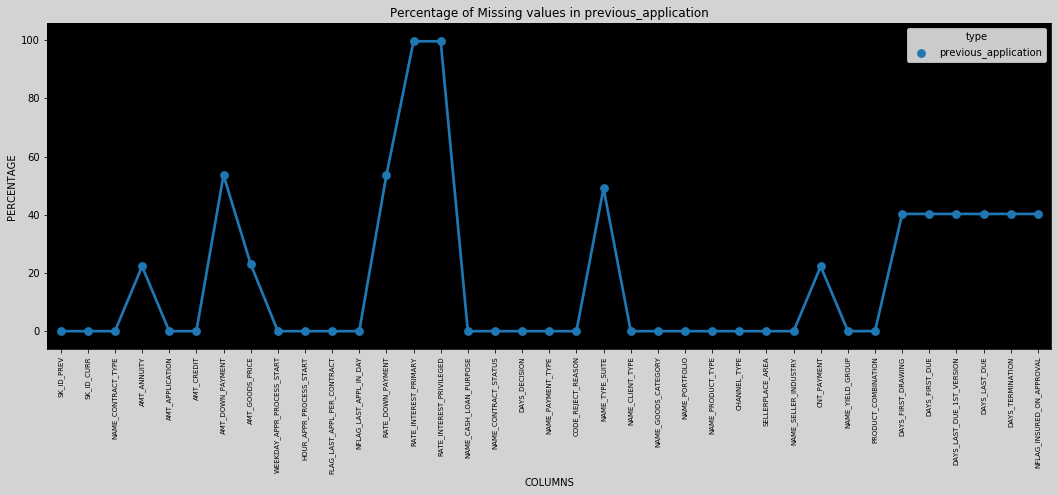

In [10]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [11]:
print("Percentage of missing  values in previous application for each column")
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

Percentage of missing  values in previous application for each column


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [12]:
print("Removing columns in previous application data for missing values where missing percentage is greater than  50")
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)


Removing columns in previous application data for missing values where missing percentage is greater than  50


# DATA CLEANING- BY REPLACING NAN WITH MEDIAN/MODE/MEAN

In [13]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(previous_application['NFLAG_INSURED_ON_APPROVAL'].mode(), inplace = True)
previous_application['AMT_ANNUITY'].fillna( 15506.774631, inplace = True)
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean(), inplace = True)
previous_application['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)
previous_application['CNT_PAYMENT'].fillna(12.00, inplace = True)
previous_application['AMT_CREDIT'].fillna(78970.50 , inplace = True)
previous_application['DAYS_FIRST_DUE'].fillna(-826.000000, inplace = True)

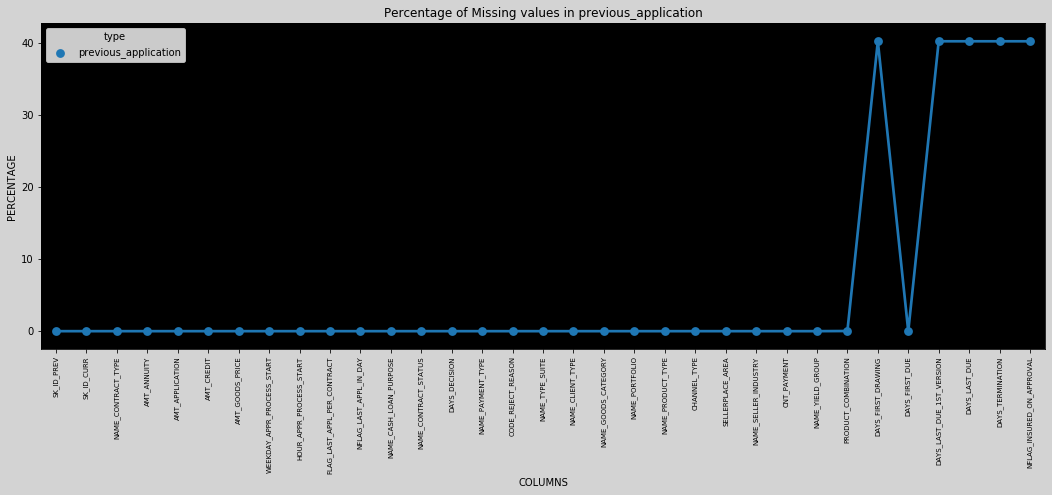

In [15]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

# COMBINING DATASET

In [16]:
# Finding Common columns
a = application_data.columns.intersection(previous_application.columns)
 
# Printing common columns
print ("Common Columns:",a)


Common Columns: Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [37]:
complete_application=pd.merge(application_data, previous_application, on='SK_ID_CURR')


# COMBINING REDUNDANT COLUMNS

In [38]:
complete_application['total_document']=complete_application.iloc[:,complete_application.columns.get_loc('FLAG_DOCUMENT_2') : complete_application.columns.get_loc('FLAG_DOCUMENT_21')].sum(axis=1,skipna=True)

In [39]:
complete_application.drop(complete_application.columns[complete_application.columns.get_loc('FLAG_DOCUMENT_2') : complete_application.columns.get_loc('FLAG_DOCUMENT_21')+1],
                       axis = 1,inplace=True,errors='ignore')

# REMOVING UNWANTED COLUMNS BASED ON DOMAIN KNOWLEDGE -USING OPENPYXL

In [40]:
import openpyxl
wb = openpyxl.load_workbook(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\columns_description.xlsx', data_only=True)
ws = wb.active
df = pd.DataFrame(columns=['Row'])
dropCols=[]
for row in ws:
    if row[1].fill.start_color.index == "FFFFFF00":
        dropCols.append(row[2].value)

In [ ]:
# TRIAL WITH STYLEFRAME

'''
import styleframe
import numpy as np
from styleframe import utils
GeneralCategories = styleframe.read_excel(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\columns_description.xlsx', read_style=True, use_openpyxl_styles=False).applymap(yellowBackground).dropna()

def yellowBackground(cell):
    return cell if cell.style.bg_color in {utils.colors.yellow, 'FFFF00'} else np.nan

def greenBackground(cell):
    return cell if cell.style.bg_color in {utils.colors.green, 'FF00FF00', 'green'} else np.nan


#SevereCategory = styleframe(GeneralCategories.applymap(yellowBackground).dropna())
print(GeneralCategories['Row'])
#NonSevereCategory = StyleFrame(GeneralCategories.applymap(greenBackground).dropna(axis=(0, 1), how='all'))
'''

In [41]:
complete_application.drop(dropCols,axis=1,inplace=True,errors='ignore')
len(complete_application.columns)

74

# REMOVE MISSING VALUES IN COMBINED DATASET

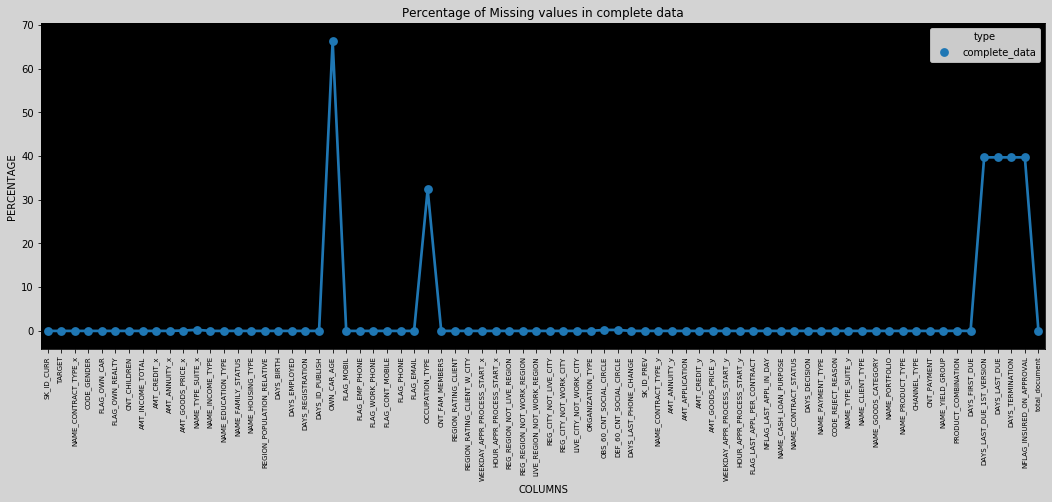

In [42]:

fig = plt.figure(figsize=(18,6))
miss_complete_data = pd.DataFrame((complete_application.isnull().sum())*100/complete_application.shape[0]).reset_index()
miss_complete_data["type"] = "complete_data"
ax = sns.pointplot("index",0,data=miss_complete_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in complete data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [43]:
print("Percentage of missing  values in  combined data for each column")
round(100*(complete_application.isnull().sum()/len(complete_application.index)),2)

Percentage of missing  values in  combined data for each column


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.29
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [46]:
complete_application=complete_application.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1,errors='ignore')

In [47]:
complete_application['NFLAG_INSURED_ON_APPROVAL'].fillna((complete_application['NFLAG_INSURED_ON_APPROVAL'].dropna()).mode(), inplace = True)
complete_application['AMT_ANNUITY_y'].fillna( 15506.774631, inplace = True)
complete_application['AMT_GOODS_PRICE_y'].fillna(complete_application['AMT_GOODS_PRICE_y'].mean(), inplace = True)
complete_application['NAME_TYPE_SUITE_y'].fillna('Unaccompanied', inplace = True)
complete_application['AMT_CREDIT_y'].fillna(78970.50 , inplace = True)
complete_application['AMT_ANNUITY_x'].fillna( 15506.774631, inplace = True)
complete_application['AMT_GOODS_PRICE_x'].fillna(complete_application['AMT_GOODS_PRICE_x'].mean(), inplace = True)
complete_application['NAME_TYPE_SUITE_x'].fillna('Unaccompanied', inplace = True)
complete_application['AMT_CREDIT_x'].fillna(78970.50 , inplace = True)
complete_application['CNT_PAYMENT'].fillna(12.00, inplace = True)
complete_application['DAYS_LAST_DUE'].fillna(-826.000000, inplace = True)
complete_application['DAYS_LAST_DUE_1ST_VERSION'].fillna( -368.000000, inplace = True)
complete_application['DAYS_FIRST_DUE'].fillna(complete_application['DAYS_FIRST_DUE'].mean(), inplace = True)
complete_application['DAYS_TERMINATION'].fillna(complete_application['DAYS_TERMINATION'].mean(), inplace = True)

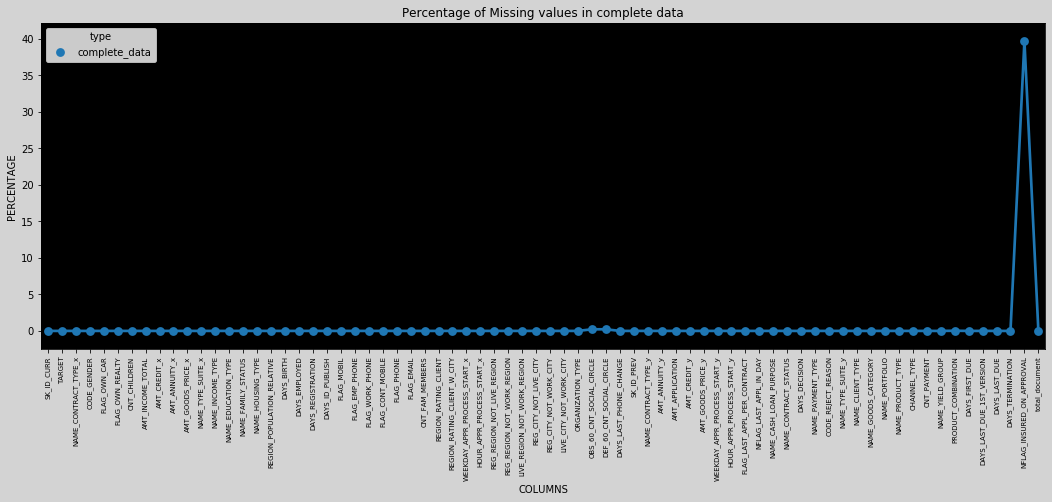

In [48]:
fig = plt.figure(figsize=(18,6))
miss_complete_data = pd.DataFrame((complete_application.isnull().sum())*100/complete_application.shape[0]).reset_index()
miss_complete_data["type"] = "complete_data"
ax = sns.pointplot("index",0,data=miss_complete_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in complete data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [35]:
complete_application['DAYS_BIRTH'] = abs(complete_application['DAYS_BIRTH'])
complete_application['DAYS_ID_PUBLISH'] = abs(complete_application['DAYS_ID_PUBLISH'])
complete_application['DAYS_ID_PUBLISH'] = abs(complete_application['DAYS_ID_PUBLISH'])
complete_application['DAYS_LAST_PHONE_CHANGE'] = abs(complete_application['DAYS_LAST_PHONE_CHANGE'])


# CORRELATION

In [36]:
complete_application.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,total_document
SK_ID_CURR,1.000000,-0.001246,-0.003099,-0.000039,-0.001194,-0.001799,-0.000648,0.000193,0.002231,0.000872,...,0.001791,-0.000634,-0.000410,-0.000325,-0.000883,0.000131,-0.000486,-0.000125,0.001295,-0.001615
TARGET,-0.001246,1.000000,0.020313,-0.002152,-0.023622,-0.007394,-0.032552,-0.035028,-0.074866,-0.047804,...,-0.027809,-0.002887,0.039901,0.023689,-0.010665,0.003772,-0.002311,0.012420,0.000653,0.015984
CNT_CHILDREN,-0.003099,0.020313,1.000000,0.011661,0.002784,0.029332,-0.001028,-0.022203,-0.363034,-0.247960,...,0.017132,0.000782,-0.012805,-0.046471,0.007009,0.005350,-0.000645,-0.007523,-0.055692,-0.015092
AMT_INCOME_TOTAL,-0.000039,-0.002152,0.011661,1.000000,0.166257,0.206280,0.167652,0.076722,-0.025717,-0.067488,...,0.043285,-0.000131,0.003942,0.016147,-0.002891,0.001718,-0.005376,0.001176,0.001486,0.020888
AMT_CREDIT_x,-0.001194,-0.023622,0.002784,0.166257,1.000000,0.758406,0.985980,0.085543,0.047639,-0.061188,...,0.046537,0.001192,-0.060109,0.035978,0.004554,0.013180,-0.038023,-0.042225,-0.016088,0.177473
AMT_ANNUITY_x,-0.001799,-0.007394,0.029332,0.206280,0.758406,1.000000,0.761841,0.102843,-0.029009,-0.109407,...,0.059844,0.001177,-0.034802,-0.004433,0.000541,0.001335,-0.048297,-0.046660,-0.009917,0.185675
AMT_GOODS_PRICE_x,-0.000648,-0.032552,-0.001028,0.167652,0.985980,0.761841,1.000000,0.088095,0.045873,-0.058726,...,0.053281,0.001617,-0.061444,0.034625,0.003298,0.008402,-0.041153,-0.046076,-0.020680,0.148161
REGION_POPULATION_RELATIVE,0.000193,-0.035028,-0.022203,0.076722,0.085543,0.102843,0.088095,1.000000,0.040122,0.000820,...,0.154786,-0.000244,-0.025677,-0.000066,0.000166,0.003634,-0.006513,-0.003389,0.022842,0.003606
DAYS_BIRTH,0.002231,-0.074866,-0.363034,-0.025717,0.047639,-0.029009,0.045873,0.040122,1.000000,0.625300,...,-0.124061,-0.000407,-0.025435,0.106549,-0.013479,-0.024603,0.011255,0.013598,0.152286,0.041049
DAYS_EMPLOYED,0.000872,-0.047804,-0.247960,-0.067488,-0.061188,-0.109407,-0.058726,0.000820,0.625300,1.000000,...,-0.107936,0.003021,0.015290,0.061270,-0.014090,-0.032325,0.012380,0.010998,0.090383,0.014641


In [50]:
complete_application.corr().iloc[1]

SK_ID_CURR                    -0.001246
TARGET                         1.000000
CNT_CHILDREN                   0.020313
AMT_INCOME_TOTAL              -0.002152
AMT_CREDIT_x                  -0.023622
AMT_ANNUITY_x                 -0.007394
AMT_GOODS_PRICE_x             -0.032552
REGION_POPULATION_RELATIVE    -0.035028
DAYS_BIRTH                     0.074866
DAYS_EMPLOYED                 -0.047804
DAYS_REGISTRATION              0.043123
DAYS_ID_PUBLISH                0.051037
FLAG_MOBIL                          NaN
FLAG_EMP_PHONE                 0.048750
FLAG_WORK_PHONE                0.028261
FLAG_CONT_MOBILE              -0.000059
FLAG_PHONE                    -0.021385
FLAG_EMAIL                     0.002063
CNT_FAM_MEMBERS                0.014847
REGION_RATING_CLIENT           0.056932
REGION_RATING_CLIENT_W_CITY    0.059700
HOUR_APPR_PROCESS_START_x     -0.022448
REG_REGION_NOT_LIVE_REGION     0.003011
REG_REGION_NOT_WORK_REGION     0.006862
LIVE_REGION_NOT_WORK_REGION    0.004159


# VISUALIZATIONS

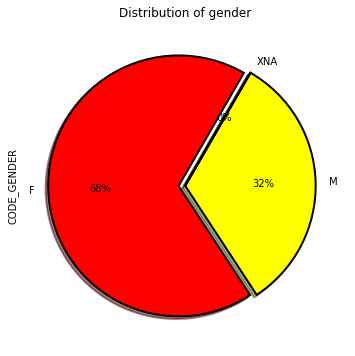

In [56]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
complete_application["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

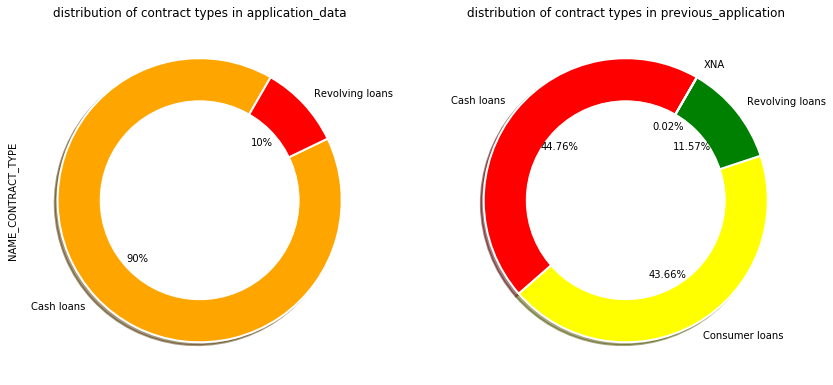

In [59]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
previous_application["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

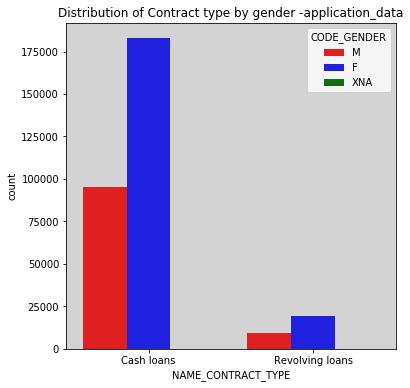

In [62]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=application_data,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

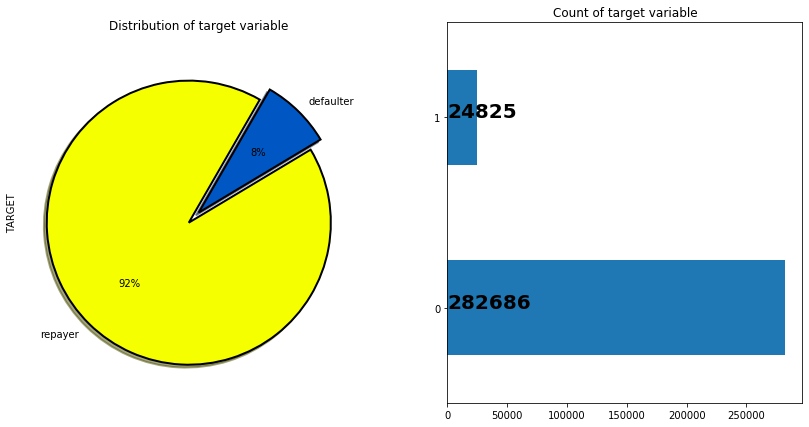

In [38]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()


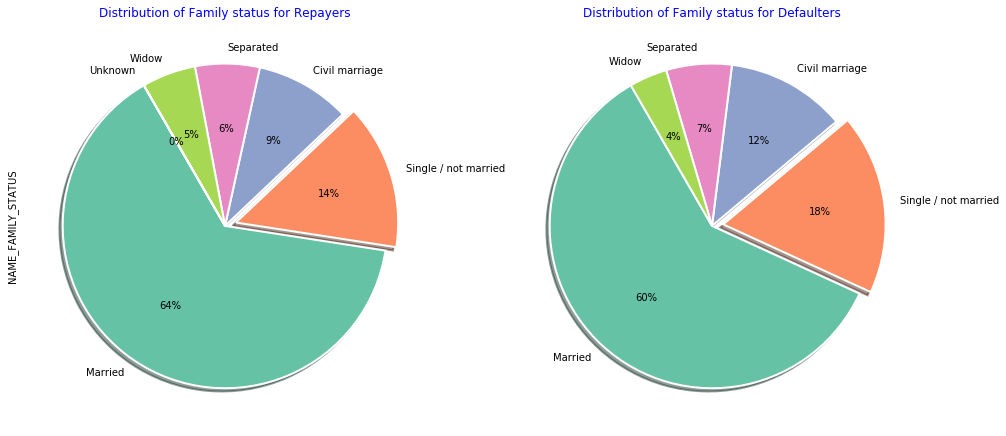

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

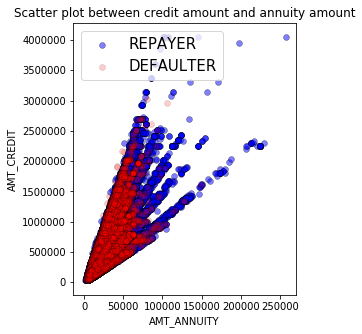

In [68]:
fig = plt.figure(figsize=(12,10))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()